# **CSC 447 Final Project**
Presented by Jawad Kabir, Fahad Faruqi

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data.csv")

## 🎯 Project Goal

Our primary goal is to assess whether **structural and sanitary conditions** of water tanks show distinct patterns across NYC and whether these conditions can help **predict compliance with health standards**.

We split the project into two parts:
- **Unsupervised Clustering**: To explore natural groupings of tanks based on condition
- **Supervised Classification**: To predict if a tank meets DOH standards using inspection results


## 🤔 Hypotheses

1. **Clustering Hypothesis**:  
   Water tanks will form **distinct clusters** based on structural and sanitary conditions.  
   These clusters may align with specific **boroughs**, revealing geographic disparities.

2. **Classification Hypothesis**:  
   Certain inspection results (like **coliform presence** or **debris detection**) are strong indicators of a tank **failing** DOH standards.  
   These patterns can be captured using classification models.

## 🧠 Methodology

### Clustering:
- **Feature selection**: Chose relevant features such as coliform presence, borough, and all `GI_RESULT_` structural checks.
- **Encoding**: Used one-hot encoding to convert categorical features to numeric form.
- **Missing data**: Dropped rows with missing values in key inspection columns.
- **Clustering**: Applied **K-Means clustering**, experimenting with different values of `k`.
- **Evaluation**: Used the **Elbow Method** to find optimal `k` and **Silhouette Score** to evaluate cluster separation.

# **Machine Learning Question**
New York has some of the best drinking water in the entire United States - often referred to as the “Champagne of Drinking Water” by some - all thanks to the Department of Environmental Protection (see final report paper for references).

The water we drink flows from upstate New York and is generally sanitary enough to be drunk as is. As New Yorkers, we pride ourselves on our drinking water - so it is *doubly important* that we maintain and **study** the water to ensure its quality.

This begs the question, is the *water safe to drink on a borough-to-borough basis*? Is Manhattan as safe as Queens? With over **8 million people** living in the boroughs, this question is extremely important to answer.

This notebook takes use of historical data provided and sourced by the Department of Health and Mental Hygiene (DOHMH) can be a useful tool to predict the sanitary conditions of water in boroughs. See below for more information on the dataset.

## 🏙️ Dataset Overview

The dataset used in this project is the **Self-Reported Drinking Water Tank Inspection Results** from NYC Open Data. It includes over **55,000 entries** spanning from **2018 to 2025**, where building owners across New York City self-report the status of their rooftop drinking water tanks.

Each record contains:
- **Geographic data**: Borough, ZIP code, coordinates
- **Structural inspections**: Internal/external structure, overflow pipes, ladders, vents
- **Sanitary indicators**: Presence of debris, insects, sediment, biological growth, birds, or rodents
- **Biological safety**: Presence of coliform or E. coli bacteria
- **Outcome label**: Whether the tank meets Department of Health (DOH) standards

This dataset provides a detailed view of drinking water tank safety across the city and serves as a basis for both unsupervised and supervised analysis.

In [3]:
df.head()

,Unnamed: 0,BIN,BOROUGH,ZIP,HOUSE_NUM,STREET_NAME,BLOCK,LOT,CONFIRMATION_NUM,REPORTING_YEAR,...,MEET_STANDARDS,DELETED,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,NTA,BATCH_DATE
0,0,1016096.0,MANHATTAN,10003.0,5,East 16th Street,844,7501,WTI3191689946,2020,...,NaN,No,40.737196,-73.992307,5.0,2.0,52.0,1.008448e+09,Hudson Yards-Chelsea-Flatiron-Union Square,05/02/2025 12:15:27 PM
1,1,1079341.0,MANHATTAN,10029.0,310,East 102nd Street,1673,6,WTI7977139904,2020,...,N,No,40.787881,-73.943925,11.0,8.0,164.0,1.016730e+09,East Harlem South,05/02/2025 12:15:41 PM
2,2,1028160.0,MANHATTAN,10023.0,37,West 65th Street,1118,5,WTI0840233874,2023,...,NaN,No,40.772281,-73.980363,7.0,6.0,149.0,1.011180e+09,Lincoln Square,05/02/2025 12:15:27 PM
3,3,1007832.0,MANHATTAN,10014.0,2,CHARLTON STREET,506,27,WTI9325086151,2018,...,Y,No,40.726980,-74.003763,2.0,3.0,37.0,1.005060e+09,SoHo-TriBeCa-Civic Center-Little Italy,05/02/2025 12:15:20 PM
4,4,1036451.0,MANHATTAN,10022.0,560,LEXINGTON AVENUE,1305,13,WTI3391983683,2017,...,Y,No,40.756651,-73.972264,5.0,4.0,100.0,1.013050e+09,Turtle Bay-East Midtown,05/02/2025 12:15:12 PM


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55768 entries, 0 to 55767
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    55768 non-null  int64  
 1   BIN                           55676 non-null  float64
 2   BOROUGH                       55768 non-null  object 
 3   ZIP                           55689 non-null  float64
 4   HOUSE_NUM                     55768 non-null  object 
 5   STREET_NAME                   55768 non-null  object 
 6   BLOCK                         55768 non-null  int64  
 7   LOT                           55768 non-null  int64  
 8   CONFIRMATION_NUM              55768 non-null  object 
 9   REPORTING_YEAR                55768 non-null  int64  
 10  TANK_NUM                      55768 non-null  int64  
 11  INSPECTION_BY_FIRM            55746 non-null  object 
 12  INSPECTION_PERFORMED          55768 non-null  object 
 13  I

In [5]:
print(df.columns)
print(df.isna().sum())

Index(['Unnamed: 0', 'BIN', 'BOROUGH', 'ZIP', 'HOUSE_NUM', 'STREET_NAME',
       'BLOCK', 'LOT', 'CONFIRMATION_NUM', 'REPORTING_YEAR', 'TANK_NUM',
       'INSPECTION_BY_FIRM', 'INSPECTION_PERFORMED', 'INSPECTION_DATE',
       'GI_REQ_INTERNAL_STRUCTURE', 'GI_RESULT_INTERNAL_STRUCTURE',
       'GI_REQ_EXTERNAL_STRUCTURE', 'GI_RESULT_EXTERNAL_STRUCTURE',
       'GI_REQ_OVERFLOW_PIPES', 'GI_RESULT_OVERFLOW_PIPES',
       'GI_REQ_ACCESS_LADDERS', 'GI_RESULT_ACCESS_LADDERS', 'GI_REQ_AIR_VENTS',
       'GI_RESULT_AIR_VENTS', 'GI_REQ_ROOF_ACCESS', 'GI_RESULT_ROOF_ACCESS',
       'SI_REQ_SEDIMENT', 'SI_RESULT_SEDIMENT', 'SI_REQ_BIOLOGICAL_GROWTH',
       'SI_RESULT_BIOLOGICAL_GROWTH', 'SI_REQ_DEBRIS_INSECTS',
       'SI_RESULT_DEBRIS_INSECTS', 'SI_REQ_RODENT_BIRD',
       'SI_RESULT_RODENT_BIRD', 'SAMPLE_COLLECTED', 'LAB_NAME',
       'NYS_CERTIFIED', 'ANALYTES', 'COLIFORM', 'ECOLI', 'MEET_STANDARDS',
       'DELETED', 'LATITUDE', 'LONGITUDE', 'COMMUNITY_BOARD',
       'COUNCIL_DISTRICT', 'CEN

# **EDA**

In [6]:
df_eda = df.copy()

In [7]:
df_eda.columns

Index(['Unnamed: 0', 'BIN', 'BOROUGH', 'ZIP', 'HOUSE_NUM', 'STREET_NAME',
       'BLOCK', 'LOT', 'CONFIRMATION_NUM', 'REPORTING_YEAR', 'TANK_NUM',
       'INSPECTION_BY_FIRM', 'INSPECTION_PERFORMED', 'INSPECTION_DATE',
       'GI_REQ_INTERNAL_STRUCTURE', 'GI_RESULT_INTERNAL_STRUCTURE',
       'GI_REQ_EXTERNAL_STRUCTURE', 'GI_RESULT_EXTERNAL_STRUCTURE',
       'GI_REQ_OVERFLOW_PIPES', 'GI_RESULT_OVERFLOW_PIPES',
       'GI_REQ_ACCESS_LADDERS', 'GI_RESULT_ACCESS_LADDERS', 'GI_REQ_AIR_VENTS',
       'GI_RESULT_AIR_VENTS', 'GI_REQ_ROOF_ACCESS', 'GI_RESULT_ROOF_ACCESS',
       'SI_REQ_SEDIMENT', 'SI_RESULT_SEDIMENT', 'SI_REQ_BIOLOGICAL_GROWTH',
       'SI_RESULT_BIOLOGICAL_GROWTH', 'SI_REQ_DEBRIS_INSECTS',
       'SI_RESULT_DEBRIS_INSECTS', 'SI_REQ_RODENT_BIRD',
       'SI_RESULT_RODENT_BIRD', 'SAMPLE_COLLECTED', 'LAB_NAME',
       'NYS_CERTIFIED', 'ANALYTES', 'COLIFORM', 'ECOLI', 'MEET_STANDARDS',
       'DELETED', 'LATITUDE', 'LONGITUDE', 'COMMUNITY_BOARD',
       'COUNCIL_DISTRICT', 'CEN

In [8]:
df_eda["MEET_STANDARDS"] = df_eda["MEET_STANDARDS"].replace({"Y": True, "N": False})

# based on the form they fill out
df_eda["COLIFORM"] = df_eda["COLIFORM"].replace({"P": True, "A": False})
df_eda["ECOLI"] = df["ECOLI"].replace(
    {"P": True, "A": False}
)  # based on the form they fill out

In [9]:
print("Duplicates:", df_eda.duplicated().sum())
print(
    "\nStandards Distributions:\n",
    df_eda["MEET_STANDARDS"].value_counts(normalize=True),
    sep="",
)
print(
    "\nColiform Distributions:\n", df_eda["COLIFORM"].value_counts(normalize=True), sep=""
)

print(
    "\nEcoli Distributions:\n", df_eda["ECOLI"].value_counts(normalize=True), sep=""
)

Duplicates: 0

Standards Distributions:
MEET_STANDARDS
True     0.599443
False    0.400557
Name: proportion, dtype: float64

Coliform Distributions:
COLIFORM
False    0.979474
True     0.020526
Name: proportion, dtype: float64

Ecoli Distributions:
ECOLI
False    0.979959
True     0.020041
Name: proportion, dtype: float64


In [10]:
print('Unique Values in "MEET_STANDARDS":', df_eda["MEET_STANDARDS"].unique())
num_nas = df_eda["MEET_STANDARDS"].isna().sum()
num_values = df_eda.shape[0]

print(f'Num NAN in "MEET_STANDARDS": {round(num_nas / num_values, 5) * 100}%')

print()

print('Unique Values in "COLIFORM":', df_eda["COLIFORM"].unique())
num_nas = df_eda["COLIFORM"].isna().sum()
num_values = df_eda.shape[0]

print(f'Num NAN in "COLIFORM": {round(num_nas / num_values, 5) * 100}%')

print()

print('Unique Values in "ECOLI":', df_eda["ECOLI"].unique())
num_nas = df_eda["ECOLI"].isna().sum()
num_values = df_eda.shape[0]

print(f'Num NAN in "ECOLI": {round(num_nas / num_values, 5) * 100}%')

Unique Values in "MEET_STANDARDS": [nan False True]
Num NAN in "MEET_STANDARDS": 80.048%

Unique Values in "COLIFORM": [False True nan]
Num NAN in "COLIFORM": 0.23700000000000002%

Unique Values in "ECOLI": [False True nan]
Num NAN in "ECOLI": 0.23700000000000002%


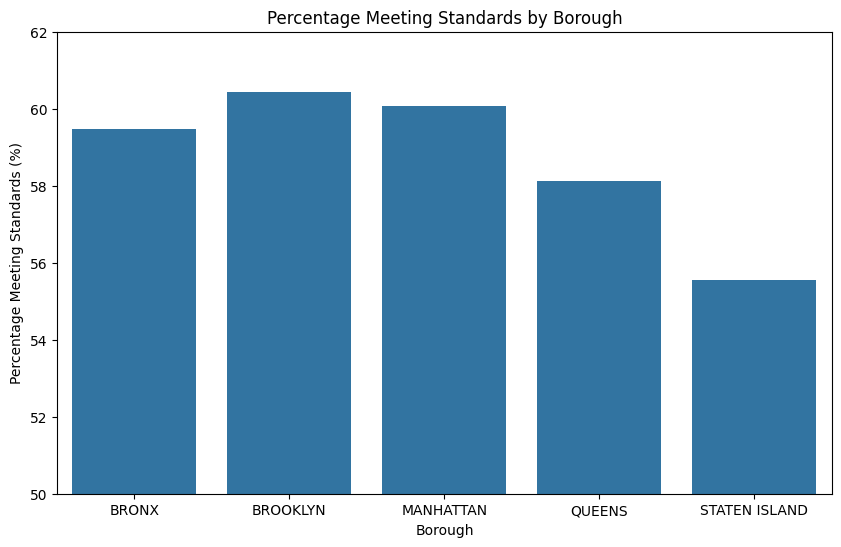

In [11]:
borough_pct = df_eda.groupby('BOROUGH')['MEET_STANDARDS'].mean() * 100
borough_pct = borough_pct.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=borough_pct, x='BOROUGH', y='MEET_STANDARDS', errorbar=None)
plt.title("Percentage Meeting Standards by Borough")
plt.ylabel("Percentage Meeting Standards (%)")
plt.xlabel("Borough")
plt.ylim(50, 62)
plt.show()

Staten Island has the least percentage of meeting standards, with Brooklyn and Manhattan being the most

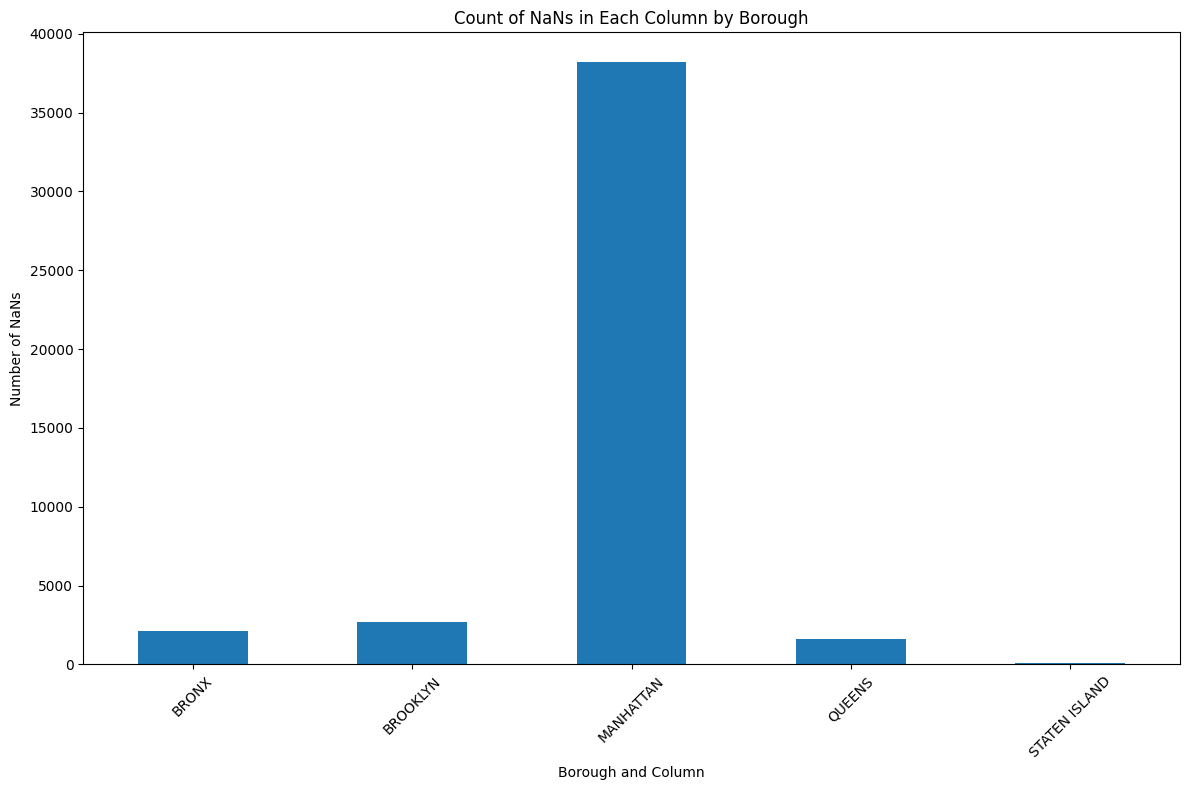

In [12]:
import matplotlib.pyplot as plt

nan_counts_by_borough = df_eda.groupby('BOROUGH')['MEET_STANDARDS'].apply(lambda x: x.isna().sum())

nan_counts_by_borough.plot(kind="bar", figsize=(12, 8))
plt.title("Count of NaNs in Each Column by Borough")
plt.ylabel("Number of NaNs")
plt.xlabel("Borough and Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Manhattan has the most missing data, perhaps due to the fact that it has the most water tanks in NYC (see scatterplot below).

Porpotionally, we can see that the other boroughs have missing data as well, but not in the same quantity as Manhattan.

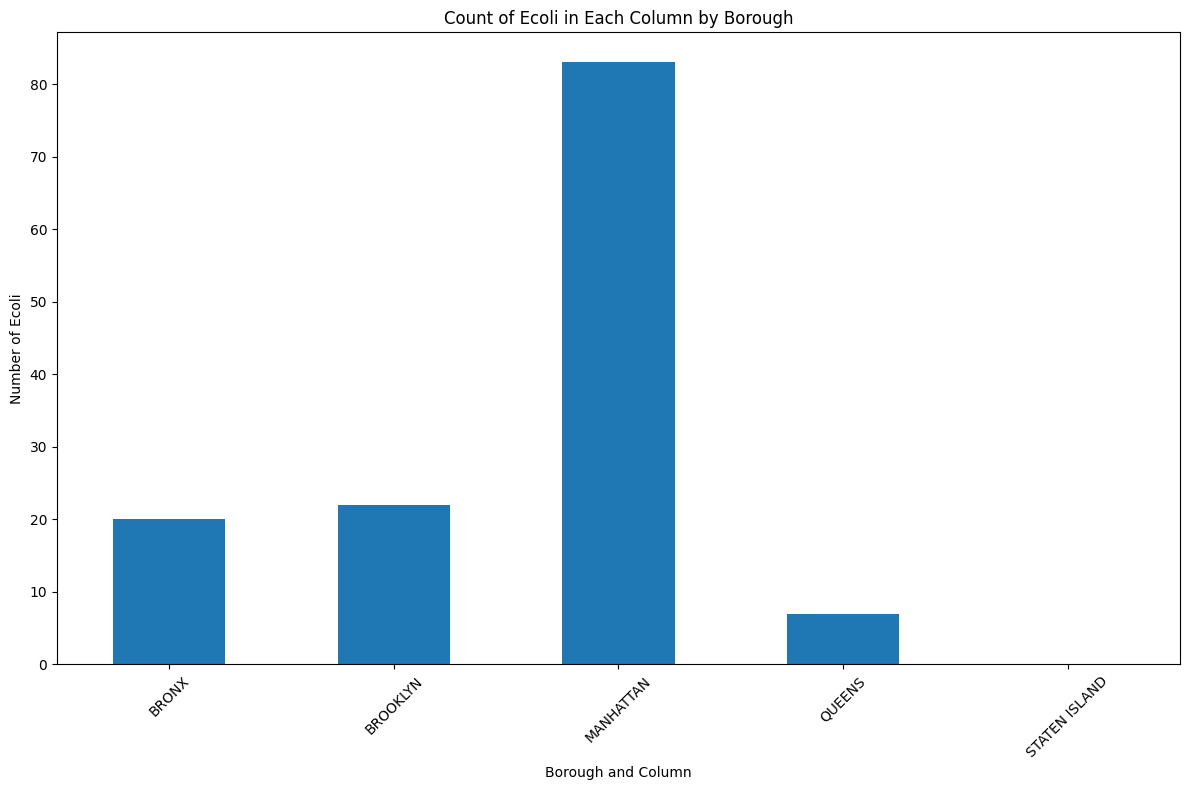

In [13]:
import matplotlib.pyplot as plt

ecoli_counts_by_borough = df_eda.groupby("BOROUGH")["ECOLI"].apply(
    lambda x: x.isna().sum()
)

ecoli_counts_by_borough.plot(kind="bar", figsize=(12, 8))
plt.title("Count of Ecoli in Each Column by Borough")
plt.ylabel("Number of Ecoli")
plt.xlabel("Borough and Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

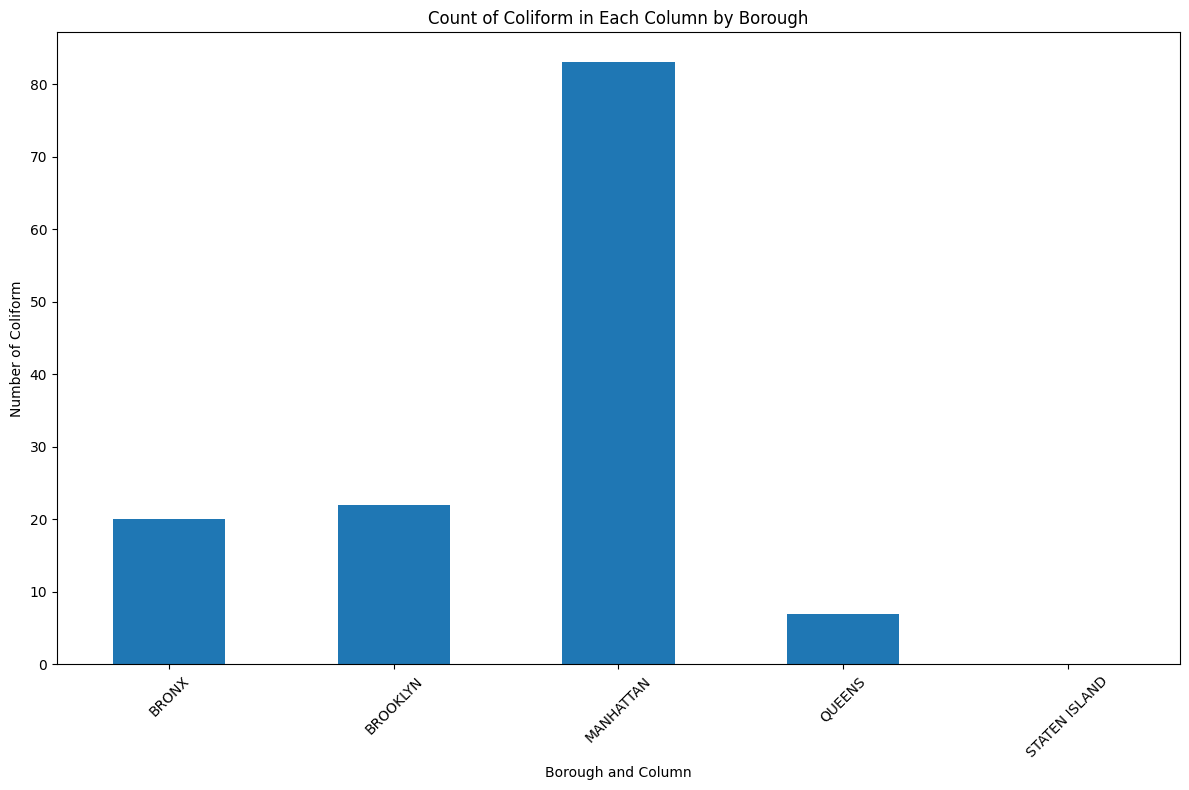

In [14]:
import matplotlib.pyplot as plt

coliform_counts_by_borough = df_eda.groupby("BOROUGH")["COLIFORM"].apply(lambda x: x.isna().sum())

coliform_counts_by_borough.plot(kind="bar", figsize=(12, 8))
plt.title("Count of Coliform in Each Column by Borough")
plt.ylabel("Number of Coliform")
plt.xlabel("Borough and Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

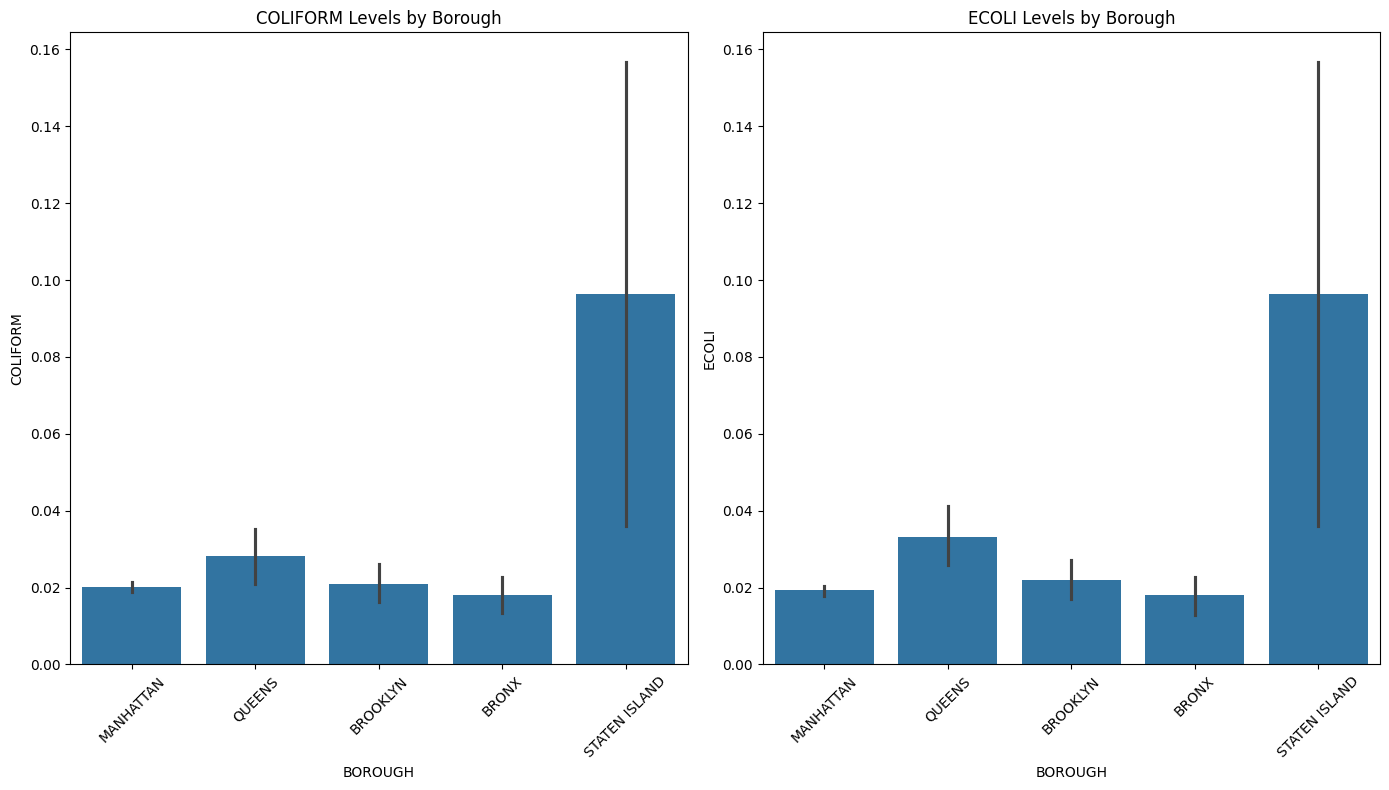

In [15]:
plt.figure(figsize=(14, 8))
params_to_plot = ["COLIFORM", "ECOLI"]

for i, param in enumerate(params_to_plot):
    plt.subplot(1, len(params_to_plot), i + 1)
    sns.barplot(x="BOROUGH", y=param, data=df_eda)
    plt.title(f"{param} Levels by Borough")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Shockingly, despite having the least amount of water tanks, porpotionally, Staten Island has the most coliform and e coli numbers - with Manhattan being some of the lowest. This may be due to sheer quantity of water tanks in Manhattan versus Staten Island (see scatter plot below for quantity metrics)

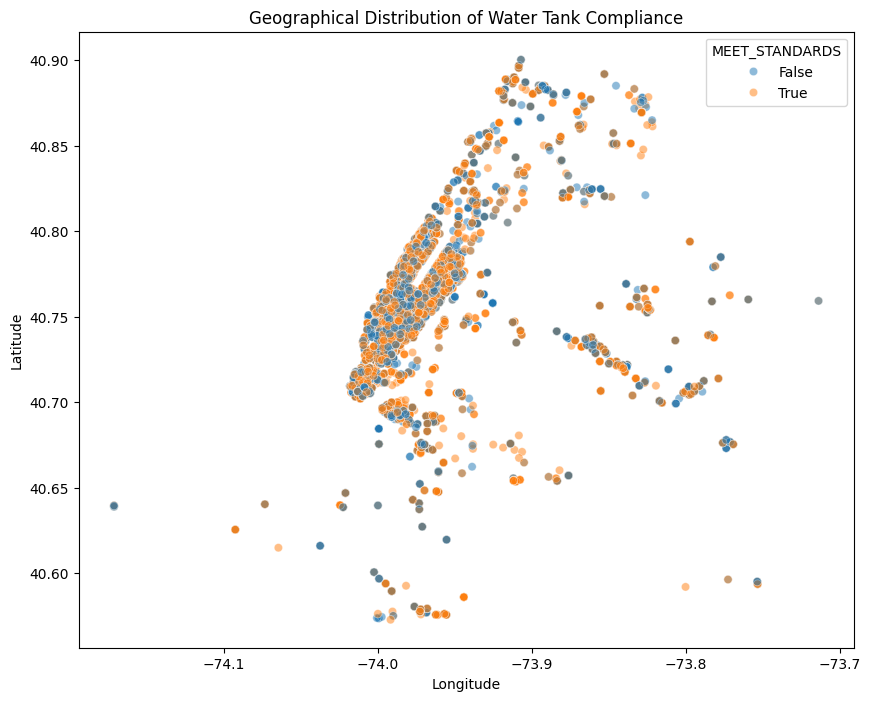

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_eda, x='LONGITUDE', y='LATITUDE', hue='MEET_STANDARDS', alpha=0.5)
plt.title('Geographical Distribution of Water Tank Compliance')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Looks like the data clearly maps out NYC :)
Majority of the tanks seem to be in downtown manhattan and midtown.

There is also no clear cluster of compliant and non compliant water tanks by lattitude and longitude

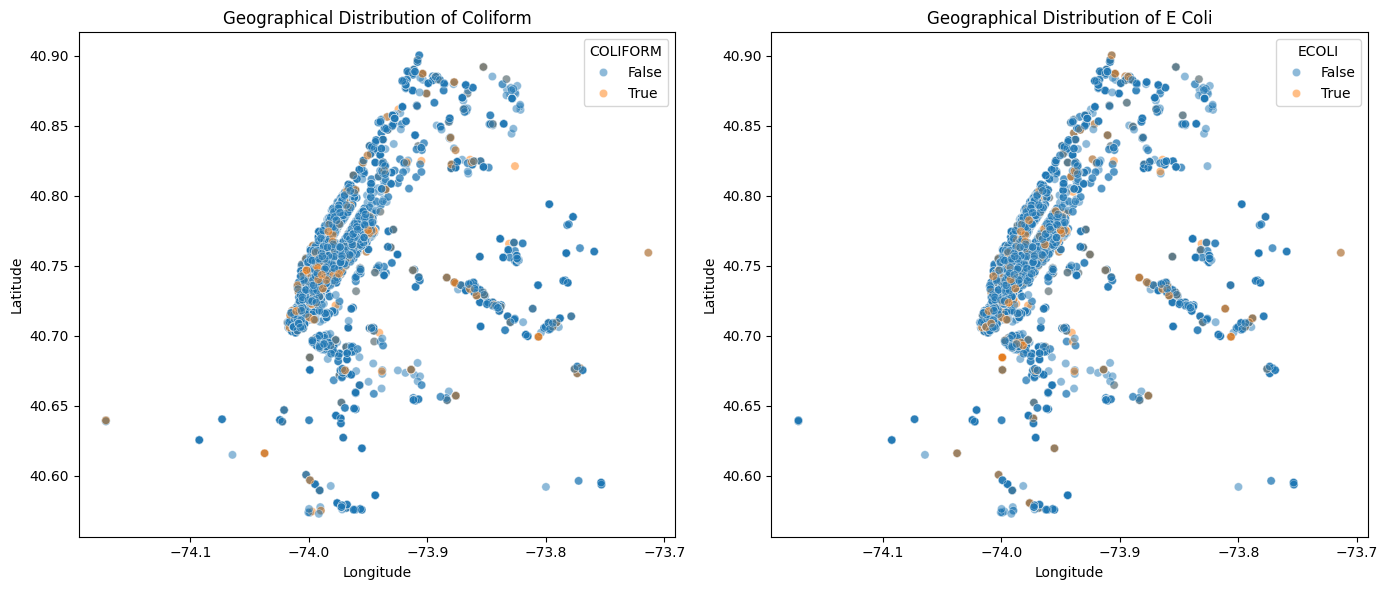

In [17]:
df_eda_no_na = df_eda.dropna(subset=["MEET_STANDARDS"])
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_eda_no_na, x='LONGITUDE', y='LATITUDE', hue='COLIFORM', alpha=0.5)
plt.title('Geographical Distribution of Coliform')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_eda_no_na, x='LONGITUDE', y='LATITUDE', hue='ECOLI', alpha=0.5)
plt.title('Geographical Distribution of E Coli')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

If our label were to predict instances of ecoli or coliform, we would be able to cluster.

It looks like coliform is more likely the lincoln center area and midtown while ecoli is more common in the financial district and lincoln center area.

Not a good day to be from the lincoln center area .

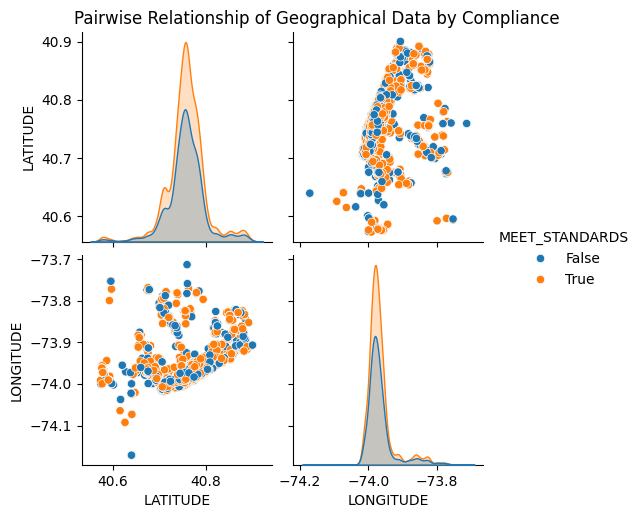

In [18]:
sns.pairplot(df_eda, vars=['LATITUDE', 'LONGITUDE'], hue='MEET_STANDARDS', diag_kind='kde')
plt.suptitle('Pairwise Relationship of Geographical Data by Compliance', y=1.02)
plt.show()

There does not seem to be a clear relationship between location and compliance

<Figure size 1200x600 with 0 Axes>

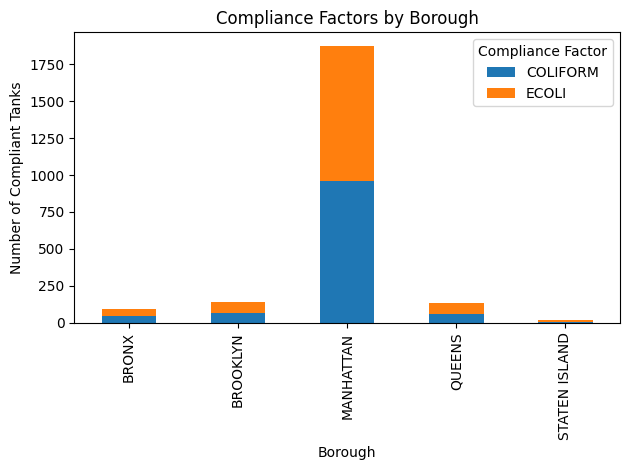

In [19]:
compliance_cols = ["COLIFORM", "ECOLI"]
compliance_counts = df_eda.groupby("BOROUGH")[compliance_cols].sum()

plt.figure(figsize=(12, 6))
compliance_counts.plot(kind="bar", stacked=True)
plt.title("Compliance Factors by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Compliant Tanks")
plt.legend(title="Compliance Factor")
plt.tight_layout()
plt.show()

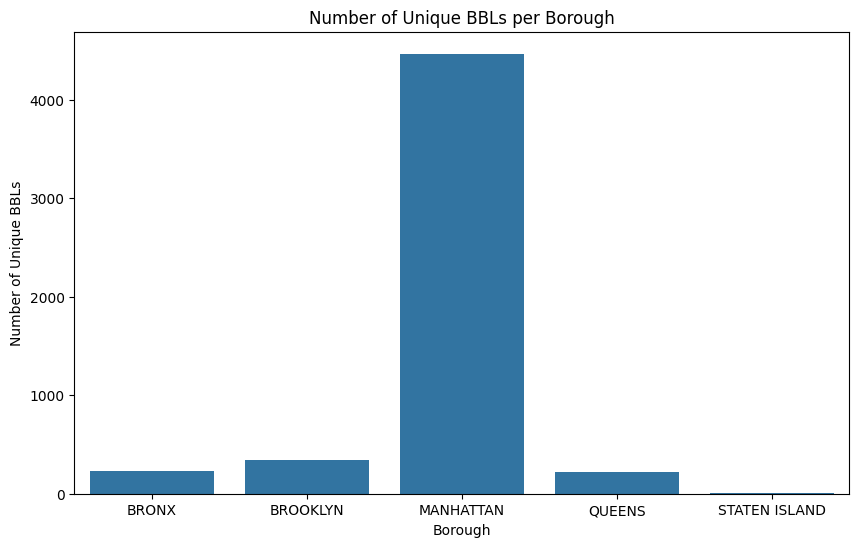

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

bbl_counts_by_borough = df_eda.groupby('BOROUGH')['BBL'].nunique().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=bbl_counts_by_borough, x='BOROUGH', y='BBL')
plt.title("Number of Unique BBLs per Borough")
plt.ylabel("Number of Unique BBLs")
plt.xlabel("Borough")
plt.show()

BBL -> **B**orough **B**lock **L**ot

Manhattan has the most unique BBL entries due to it's higher number of water tanks.

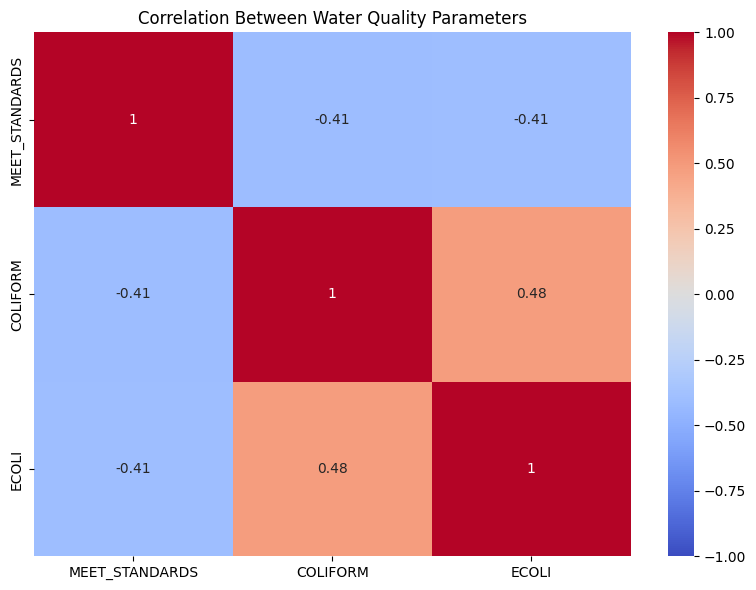

In [21]:
corr_columns = ["MEET_STANDARDS", "COLIFORM", "ECOLI"]
corr_matrix = df_eda[corr_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Water Quality Parameters")
plt.tight_layout()
plt.show()

Countplots for the three big water quality labels:

Text(0.5, 1.0, 'Standards Passed vs Failed per Borough')

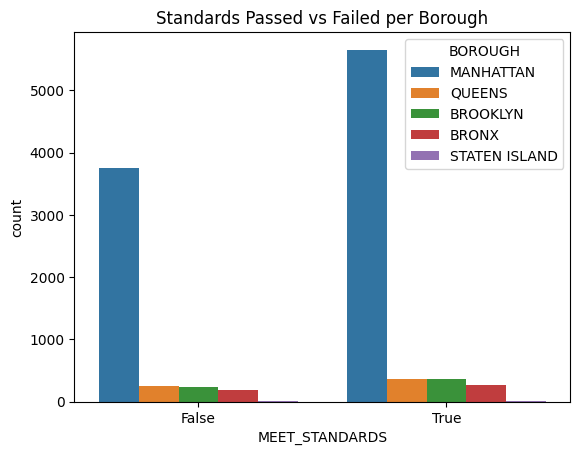

In [22]:
sns.countplot(data=df_eda, x="MEET_STANDARDS", hue="BOROUGH")
plt.title("Standards Passed vs Failed per Borough")

Text(0.5, 1.0, 'Standards Passed vs Failed per Borough')

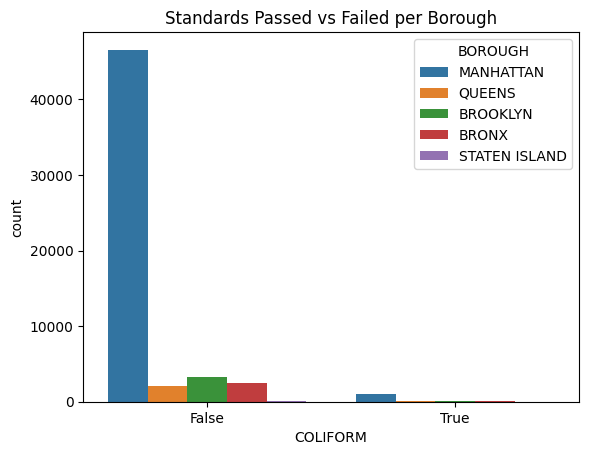

In [23]:
sns.countplot(data=df_eda, x="COLIFORM", hue="BOROUGH")
plt.title("Standards Passed vs Failed per Borough")

Text(0.5, 1.0, 'Standards Passed vs Failed per Borough')

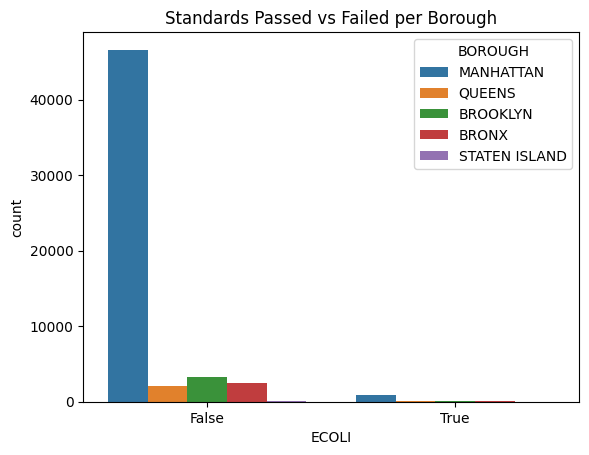

In [24]:
sns.countplot(data=df_eda, x="ECOLI", hue="BOROUGH")
plt.title("Standards Passed vs Failed per Borough")

### Classification:
- **Label**: Used `MEET_STANDARDS` as the binary outcome (`Y`/`N`).
- **Baseline model**: Logistic regression
- **Advanced models**: Random Forest, Gradient Boosting
- **Metrics**: Accuracy, precision, recall, F1-score

# **Preprocessing**

In [25]:
df_preprocess = df.copy()

In [26]:
df_preprocess.columns

Index(['Unnamed: 0', 'BIN', 'BOROUGH', 'ZIP', 'HOUSE_NUM', 'STREET_NAME',
       'BLOCK', 'LOT', 'CONFIRMATION_NUM', 'REPORTING_YEAR', 'TANK_NUM',
       'INSPECTION_BY_FIRM', 'INSPECTION_PERFORMED', 'INSPECTION_DATE',
       'GI_REQ_INTERNAL_STRUCTURE', 'GI_RESULT_INTERNAL_STRUCTURE',
       'GI_REQ_EXTERNAL_STRUCTURE', 'GI_RESULT_EXTERNAL_STRUCTURE',
       'GI_REQ_OVERFLOW_PIPES', 'GI_RESULT_OVERFLOW_PIPES',
       'GI_REQ_ACCESS_LADDERS', 'GI_RESULT_ACCESS_LADDERS', 'GI_REQ_AIR_VENTS',
       'GI_RESULT_AIR_VENTS', 'GI_REQ_ROOF_ACCESS', 'GI_RESULT_ROOF_ACCESS',
       'SI_REQ_SEDIMENT', 'SI_RESULT_SEDIMENT', 'SI_REQ_BIOLOGICAL_GROWTH',
       'SI_RESULT_BIOLOGICAL_GROWTH', 'SI_REQ_DEBRIS_INSECTS',
       'SI_RESULT_DEBRIS_INSECTS', 'SI_REQ_RODENT_BIRD',
       'SI_RESULT_RODENT_BIRD', 'SAMPLE_COLLECTED', 'LAB_NAME',
       'NYS_CERTIFIED', 'ANALYTES', 'COLIFORM', 'ECOLI', 'MEET_STANDARDS',
       'DELETED', 'LATITUDE', 'LONGITUDE', 'COMMUNITY_BOARD',
       'COUNCIL_DISTRICT', 'CEN

In [27]:
num_unique_inpection_firms = len(df_preprocess["INSPECTION_BY_FIRM"].unique())
print(f"Number of unique inspection firms: {num_unique_inpection_firms}")

Number of unique inspection firms: 711


In [28]:
df_preprocess.drop(["HOUSE_NUM", "STREET_NAME", "CONFIRMATION_NUM",
                    "INSPECTION_BY_FIRM", "REPORTING_YEAR", "LAB_NAME",
                    "INSPECTION_DATE", "BATCH_DATE", "NTA"],
                   axis=1, inplace=True)

we wil drop location and time based data as they are not relavent. Additionally, firms that inspect water will be dropped as there are simply too many to onehotencode, and doesn't apply to our research hypothesis anyways

## Encode all string columns to floats

In [29]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['BOROUGH']
encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")
encoded_columns = encoder.fit_transform(df_preprocess[categorical_columns])

In [30]:
encoded_train = pd.DataFrame(
    encoder.transform(df_preprocess[categorical_columns]),
    columns=encoder.get_feature_names_out(categorical_columns),
    index=df_preprocess.index,
)

In [31]:
df_preprocess = pd.concat(
    [df_preprocess.drop(columns=categorical_columns), encoded_train], axis=1
)

In [32]:
df_preprocess["COLIFORM"] = df_preprocess["COLIFORM"].map({'A': 0, "P": 1})
df_preprocess["ECOLI"] = df_preprocess["ECOLI"].map({'A': 0, "P": 1})

In [33]:
for col in df_preprocess.columns:
    if df_preprocess[col].dtype == "object":
      print(col, ":", df_preprocess[col].unique())

INSPECTION_PERFORMED : ['Y' 'N']
GI_REQ_INTERNAL_STRUCTURE : ['Y' 'N']
GI_RESULT_INTERNAL_STRUCTURE : ['N' 'A' nan]
GI_REQ_EXTERNAL_STRUCTURE : ['Y' 'N']
GI_RESULT_EXTERNAL_STRUCTURE : ['N' 'A' nan]
GI_REQ_OVERFLOW_PIPES : ['Y' 'N']
GI_RESULT_OVERFLOW_PIPES : ['N' 'A' nan]
GI_REQ_ACCESS_LADDERS : ['Y' 'N']
GI_RESULT_ACCESS_LADDERS : ['N' 'A' nan]
GI_REQ_AIR_VENTS : ['Y' 'N']
GI_RESULT_AIR_VENTS : ['N' 'A' nan]
GI_REQ_ROOF_ACCESS : ['Y' 'N']
GI_RESULT_ROOF_ACCESS : ['N' 'A' nan]
SI_REQ_SEDIMENT : ['Y' 'N']
SI_RESULT_SEDIMENT : ['N' 'A' nan]
SI_REQ_BIOLOGICAL_GROWTH : ['Y' 'N']
SI_RESULT_BIOLOGICAL_GROWTH : ['N' 'A' nan]
SI_REQ_DEBRIS_INSECTS : ['Y' 'N']
SI_RESULT_DEBRIS_INSECTS : ['N' 'A' nan]
SI_REQ_RODENT_BIRD : ['Y' 'N']
SI_RESULT_RODENT_BIRD : ['N' 'A' nan]
SAMPLE_COLLECTED : ['Y' 'N' nan]
NYS_CERTIFIED : ['Y' nan 'D' 'N']
ANALYTES : ['B' nan]
MEET_STANDARDS : [nan 'N' 'Y']
DELETED : ['No' 'Yes']


### Manually convert all Y/Ns to true/false

According to the inspection form -> "A" means corrective action taken, therefore something WAS there therefore True

Yes -> True
No -> False

B in Analytes means "Bacteria" found in tank, therefore True

Form in Question:

https://www.nyc.gov/assets/doh/downloads/pdf/environmental/drinking-water-inspection-form.pdf


In [34]:
yns = [
      "INSPECTION_PERFORMED", "GI_REQ_INTERNAL_STRUCTURE", "GI_RESULT_INTERNAL_STRUCTURE",
      "GI_REQ_EXTERNAL_STRUCTURE", "GI_RESULT_EXTERNAL_STRUCTURE", "GI_REQ_OVERFLOW_PIPES",
      "GI_RESULT_OVERFLOW_PIPES", "GI_REQ_ACCESS_LADDERS", "GI_RESULT_ACCESS_LADDERS",
      "GI_REQ_AIR_VENTS", "GI_RESULT_AIR_VENTS", "GI_REQ_ROOF_ACCESS", "GI_RESULT_ROOF_ACCESS",
      "SI_REQ_SEDIMENT", "SI_RESULT_SEDIMENT", "SI_REQ_BIOLOGICAL_GROWTH", "SI_RESULT_BIOLOGICAL_GROWTH",
      "SI_REQ_DEBRIS_INSECTS", "SI_RESULT_DEBRIS_INSECTS", "SI_REQ_RODENT_BIRD", "SI_RESULT_RODENT_BIRD", "SAMPLE_COLLECTED",
      "NYS_CERTIFIED", "ANALYTES", "DELETED", "MEET_STANDARDS"
      ]

for col in yns:
    df_preprocess[col] = df_preprocess[col].map({'Y': 1, "N": 0, "A": 1, "B": 1, "D": 0, "No": 0, "Yes": 1})

In [35]:
for col in df_preprocess.columns:
    if df_preprocess[col].dtype == "object":
      print(col, ":", df_preprocess[col].unique())

No output means all values are NOT of `object` type

In [36]:
df_preprocess.columns

Index(['Unnamed: 0', 'BIN', 'ZIP', 'BLOCK', 'LOT', 'TANK_NUM',
       'INSPECTION_PERFORMED', 'GI_REQ_INTERNAL_STRUCTURE',
       'GI_RESULT_INTERNAL_STRUCTURE', 'GI_REQ_EXTERNAL_STRUCTURE',
       'GI_RESULT_EXTERNAL_STRUCTURE', 'GI_REQ_OVERFLOW_PIPES',
       'GI_RESULT_OVERFLOW_PIPES', 'GI_REQ_ACCESS_LADDERS',
       'GI_RESULT_ACCESS_LADDERS', 'GI_REQ_AIR_VENTS', 'GI_RESULT_AIR_VENTS',
       'GI_REQ_ROOF_ACCESS', 'GI_RESULT_ROOF_ACCESS', 'SI_REQ_SEDIMENT',
       'SI_RESULT_SEDIMENT', 'SI_REQ_BIOLOGICAL_GROWTH',
       'SI_RESULT_BIOLOGICAL_GROWTH', 'SI_REQ_DEBRIS_INSECTS',
       'SI_RESULT_DEBRIS_INSECTS', 'SI_REQ_RODENT_BIRD',
       'SI_RESULT_RODENT_BIRD', 'SAMPLE_COLLECTED', 'NYS_CERTIFIED',
       'ANALYTES', 'COLIFORM', 'ECOLI', 'MEET_STANDARDS', 'DELETED',
       'LATITUDE', 'LONGITUDE', 'COMMUNITY_BOARD', 'COUNCIL_DISTRICT',
       'CENSUS_TRACT', 'BBL', 'BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN',
       'BOROUGH_QUEENS', 'BOROUGH_STATEN ISLAND'],
      dtype='object')

## Treat NANs

In [37]:
# drop all NANs for y -> "MEET_STANDARDS"
df_preprocess.dropna(subset=["MEET_STANDARDS"], inplace=True)

In [38]:
print(df_preprocess.shape)
df_preprocess.head()

(11127, 44)


,Unnamed: 0,BIN,ZIP,BLOCK,LOT,TANK_NUM,INSPECTION_PERFORMED,GI_REQ_INTERNAL_STRUCTURE,GI_RESULT_INTERNAL_STRUCTURE,GI_REQ_EXTERNAL_STRUCTURE,...,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
1,1,1079341.0,10029.0,1673,6,1,1,1,0.0,1,...,40.787881,-73.943925,11.0,8.0,164.0,1.016730e+09,0.0,1.0,0.0,0.0
3,3,1007832.0,10014.0,506,27,1,1,1,0.0,1,...,40.726980,-74.003763,2.0,3.0,37.0,1.005060e+09,0.0,1.0,0.0,0.0
4,4,1036451.0,10022.0,1305,13,1,1,1,0.0,1,...,40.756651,-73.972264,5.0,4.0,100.0,1.013050e+09,0.0,1.0,0.0,0.0
6,6,1082365.0,10128.0,1573,1,2,1,1,0.0,1,...,40.781684,-73.945848,8.0,5.0,152.0,1.015730e+09,0.0,1.0,0.0,0.0
21,21,4432046.0,11375.0,2133,16,1,1,1,0.0,1,...,40.728526,-73.851538,6.0,29.0,71304.0,4.021330e+09,0.0,0.0,1.0,0.0


Clean column names of non-ascii characters for miceforest

In [39]:
import unicodedata
import re

def clean_feature_name(name):
    name_ascii = unicodedata.normalize('NFKD', name).encode('ascii', 'ignore').decode('ascii')
    name_ascii = re.sub(r'[{}\[\]:,"\'/&%#@$\(\).]', '_', name_ascii)
    name_ascii = re.sub(r'[^a-zA-Z0-9_]', '', name_ascii)
    return name_ascii

df_preprocess.columns = [clean_feature_name(col) for col in df_preprocess.columns]

In [40]:
df_preprocess.shape

(11127, 44)

### Use `miceforest` library to impute missing values

In [41]:
!pip install miceforest --no-cache-dir

In [42]:
df_clone = df_preprocess.copy()
df_clone.shape

(11127, 44)

In [43]:
from miceforest import ImputationKernel

df_clone = df_preprocess.copy()
df_clone.reset_index(inplace=True, drop=True)
kernel = ImputationKernel(data=df_clone, random_state=420)
kernel.mice(2)
df_imputed = kernel.complete_data()

In [44]:
print(df_imputed.shape)
df_imputed.head()

(11127, 44)


,Unnamed_0,BIN,ZIP,BLOCK,LOT,TANK_NUM,INSPECTION_PERFORMED,GI_REQ_INTERNAL_STRUCTURE,GI_RESULT_INTERNAL_STRUCTURE,GI_REQ_EXTERNAL_STRUCTURE,...,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATENISLAND
0,1,1079341.0,10029.0,1673,6,1,1,1,0.0,1,...,40.787881,-73.943925,11.0,8.0,164.0,1.016730e+09,0.0,1.0,0.0,0.0
1,3,1007832.0,10014.0,506,27,1,1,1,0.0,1,...,40.726980,-74.003763,2.0,3.0,37.0,1.005060e+09,0.0,1.0,0.0,0.0
2,4,1036451.0,10022.0,1305,13,1,1,1,0.0,1,...,40.756651,-73.972264,5.0,4.0,100.0,1.013050e+09,0.0,1.0,0.0,0.0
3,6,1082365.0,10128.0,1573,1,2,1,1,0.0,1,...,40.781684,-73.945848,8.0,5.0,152.0,1.015730e+09,0.0,1.0,0.0,0.0
4,21,4432046.0,11375.0,2133,16,1,1,1,0.0,1,...,40.728526,-73.851538,6.0,29.0,71304.0,4.021330e+09,0.0,0.0,1.0,0.0


In [45]:
df = df_imputed
del(df_imputed, df_clone, df_preprocess)

In [46]:
df.isna().sum()

,0
Unnamed_0,0
BIN,0
ZIP,0
BLOCK,0
LOT,0
TANK_NUM,0
INSPECTION_PERFORMED,0
GI_REQ_INTERNAL_STRUCTURE,0
GI_RESULT_INTERNAL_STRUCTURE,0
GI_REQ_EXTERNAL_STRUCTURE,0


### Stats
just making sure ...

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed_0                     11127 non-null  int64  
 1   BIN                           11127 non-null  float64
 2   ZIP                           11127 non-null  float64
 3   BLOCK                         11127 non-null  int64  
 4   LOT                           11127 non-null  int64  
 5   TANK_NUM                      11127 non-null  int64  
 6   INSPECTION_PERFORMED          11127 non-null  int64  
 7   GI_REQ_INTERNAL_STRUCTURE     11127 non-null  int64  
 8   GI_RESULT_INTERNAL_STRUCTURE  11127 non-null  float64
 9   GI_REQ_EXTERNAL_STRUCTURE     11127 non-null  int64  
 10  GI_RESULT_EXTERNAL_STRUCTURE  11127 non-null  float64
 11  GI_REQ_OVERFLOW_PIPES         11127 non-null  int64  
 12  GI_RESULT_OVERFLOW_PIPES      11127 non-null  float64
 13  G

# **Feature Selection/Dimensionality Reduction**

In [48]:
label = "MEET_STANDARDS"

In [49]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=[label])
y = df[label]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

rf_feature_importances = pd.DataFrame(
    {"Feature": X.columns, "Importance": model.feature_importances_}
).sort_values(by="Importance", ascending=False)

rf_feature_importances

,Feature,Importance
0,Unnamed_0,0.318246
31,ECOLI,0.130841
30,COLIFORM,0.122131
1,BIN,0.061998
34,LONGITUDE,0.061887
33,LATITUDE,0.060964
4,LOT,0.053137
38,BBL,0.047798
3,BLOCK,0.046284
37,CENSUS_TRACT,0.032446


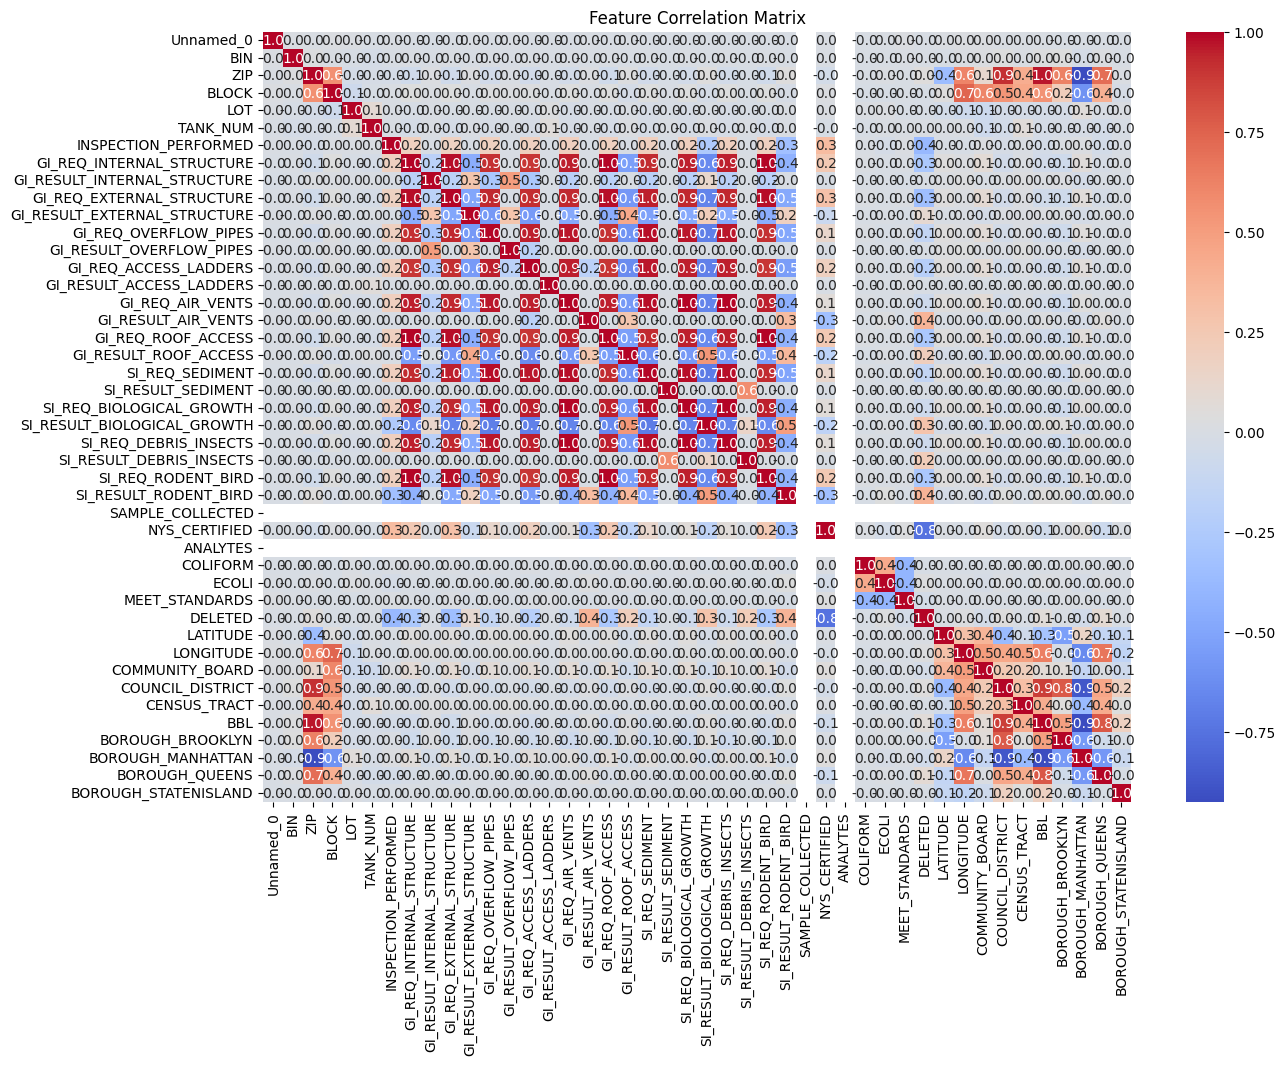

Correlations with Survival:


,MEET_STANDARDS
MEET_STANDARDS,1.000000
NYS_CERTIFIED,0.028354
Unnamed_0,0.018512
INSPECTION_PERFORMED,0.011598
GI_RESULT_ACCESS_LADDERS,0.010960
GI_REQ_EXTERNAL_STRUCTURE,0.008987
GI_REQ_ACCESS_LADDERS,0.007015
GI_REQ_INTERNAL_STRUCTURE,0.007015
SI_REQ_RODENT_BIRD,0.007015
GI_REQ_ROOF_ACCESS,0.007015


In [50]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Feature Correlation Matrix")
plt.show()

corr_survival_correlations = corr_matrix["MEET_STANDARDS"].sort_values(ascending=False)
print("Correlations with Survival:")
corr_survival_correlations

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X_num = df.select_dtypes(include=[np.number])
X_num = X_num.drop(columns=[label])

estimator = LogisticRegression(max_iter=10000)

selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_num, y)

rfe_selected_features = X_num.columns[selector.support_]
print("Features selected by RFE:")
rfe_selected_features

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Features selected by RFE:


Index(['GI_RESULT_INTERNAL_STRUCTURE', 'SI_RESULT_SEDIMENT', 'COLIFORM',
       'ECOLI', 'DELETED'],
      dtype='object')

In [52]:
from sklearn.feature_selection import SelectKBest, chi2

encoded_cols = [
    col
    for col in df.columns
    if col.startswith(f"BOROUGH_")
]

X_cat = df[encoded_cols]
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X_cat, y)


ch2_selected_features = X_cat.columns[selector.get_support()]
print("Top encoded categorical features by chi-squared test:")
ch2_selected_features

Top encoded categorical features by chi-squared test:


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(


Index(['BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN', 'BOROUGH_QUEENS',
       'BOROUGH_STATENISLAND'],
      dtype='object')

In [53]:
corr = []
for key, value in corr_survival_correlations.items():
    if key != label:
      corr.append(key)
print(corr)

['NYS_CERTIFIED', 'Unnamed_0', 'INSPECTION_PERFORMED', 'GI_RESULT_ACCESS_LADDERS', 'GI_REQ_EXTERNAL_STRUCTURE', 'GI_REQ_ACCESS_LADDERS', 'GI_REQ_INTERNAL_STRUCTURE', 'SI_REQ_RODENT_BIRD', 'GI_REQ_ROOF_ACCESS', 'BOROUGH_MANHATTAN', 'GI_REQ_OVERFLOW_PIPES', 'BIN', 'COMMUNITY_BOARD', 'TANK_NUM', 'LATITUDE', 'SI_REQ_SEDIMENT', 'BOROUGH_BROOKLYN', 'SI_REQ_BIOLOGICAL_GROWTH', 'SI_REQ_DEBRIS_INSECTS', 'GI_REQ_AIR_VENTS', 'BLOCK', 'COUNCIL_DISTRICT', 'LONGITUDE', 'BOROUGH_STATENISLAND', 'ZIP', 'CENSUS_TRACT', 'BBL', 'GI_RESULT_ROOF_ACCESS', 'SI_RESULT_BIOLOGICAL_GROWTH', 'SI_RESULT_DEBRIS_INSECTS', 'BOROUGH_QUEENS', 'SI_RESULT_RODENT_BIRD', 'LOT', 'GI_RESULT_EXTERNAL_STRUCTURE', 'GI_RESULT_OVERFLOW_PIPES', 'GI_RESULT_AIR_VENTS', 'GI_RESULT_INTERNAL_STRUCTURE', 'SI_RESULT_SEDIMENT', 'DELETED', 'ECOLI', 'COLIFORM', 'SAMPLE_COLLECTED', 'ANALYTES']


In [54]:
rf_feature_importances.sort_values(by="Importance", inplace=True, ascending=False)
rf = rf_feature_importances["Feature"].tolist()

In [55]:
best_features = list(set(rfe_selected_features) | set(ch2_selected_features) | set(corr[:5]) | set(rf[:5]))
best_features

['BOROUGH_BROOKLYN',
 'GI_RESULT_ACCESS_LADDERS',
 'DELETED',
 'COLIFORM',
 'BOROUGH_MANHATTAN',
 'INSPECTION_PERFORMED',
 'ECOLI',
 'BOROUGH_QUEENS',
 'GI_RESULT_INTERNAL_STRUCTURE',
 'BIN',
 'SI_RESULT_SEDIMENT',
 'GI_REQ_EXTERNAL_STRUCTURE',
 'BOROUGH_STATENISLAND',
 'LONGITUDE',
 'Unnamed_0',
 'NYS_CERTIFIED']

In [56]:
df.shape

(11127, 44)

Note for others, use the `best_features` list as the features

# **Model Training**

## Classification

In [57]:
df.columns

Index(['Unnamed_0', 'BIN', 'ZIP', 'BLOCK', 'LOT', 'TANK_NUM',
       'INSPECTION_PERFORMED', 'GI_REQ_INTERNAL_STRUCTURE',
       'GI_RESULT_INTERNAL_STRUCTURE', 'GI_REQ_EXTERNAL_STRUCTURE',
       'GI_RESULT_EXTERNAL_STRUCTURE', 'GI_REQ_OVERFLOW_PIPES',
       'GI_RESULT_OVERFLOW_PIPES', 'GI_REQ_ACCESS_LADDERS',
       'GI_RESULT_ACCESS_LADDERS', 'GI_REQ_AIR_VENTS', 'GI_RESULT_AIR_VENTS',
       'GI_REQ_ROOF_ACCESS', 'GI_RESULT_ROOF_ACCESS', 'SI_REQ_SEDIMENT',
       'SI_RESULT_SEDIMENT', 'SI_REQ_BIOLOGICAL_GROWTH',
       'SI_RESULT_BIOLOGICAL_GROWTH', 'SI_REQ_DEBRIS_INSECTS',
       'SI_RESULT_DEBRIS_INSECTS', 'SI_REQ_RODENT_BIRD',
       'SI_RESULT_RODENT_BIRD', 'SAMPLE_COLLECTED', 'NYS_CERTIFIED',
       'ANALYTES', 'COLIFORM', 'ECOLI', 'MEET_STANDARDS', 'DELETED',
       'LATITUDE', 'LONGITUDE', 'COMMUNITY_BOARD', 'COUNCIL_DISTRICT',
       'CENSUS_TRACT', 'BBL', 'BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN',
       'BOROUGH_QUEENS', 'BOROUGH_STATENISLAND'],
      dtype='object')

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split

In [59]:
X = df[best_features].copy()
y = df['MEET_STANDARDS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [60]:
pipelines = {
    "LogisticRegression": Pipeline(
        [("scaler", StandardScaler()), ("model", LogisticRegression(random_state=42))]
    ),
    "GaussianNB": Pipeline([("scaler", StandardScaler()), ("model", GaussianNB())]),
    "DecisionTree": Pipeline([("model", DecisionTreeClassifier(random_state=42))]),
    "RandomForest": Pipeline([("model", RandomForestClassifier(random_state=42))]),
}

results = {}
for name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
    results[name] = {"cv_mean": cv_scores.mean(), "cv_std": cv_scores.std()}
    print(f"{name} - Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

LogisticRegression - Accuracy: 0.7512 (±0.0058)
GaussianNB - Accuracy: 0.7500 (±0.0059)
DecisionTree - Accuracy: 0.5660 (±0.1140)
RandomForest - Accuracy: 0.6086 (±0.1168)


In [61]:
# Hyperparameter grids
param_grids = {
    "LogisticRegression": {
        "model__C": [0.01, 0.1, 1, 10, 100],
        "model__solver": ["liblinear", "saga"],
    },
    "GaussianNB": {"model__var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]},
    "DecisionTree": {
        "model__max_depth": [None, 5, 10, 15],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4],
    },
    "RandomForest": {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5],
        "model__min_samples_leaf": [1, 2],
    },
}

classification_best_models = {}
for name, pipeline in pipelines.items():
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring="accuracy")
    grid.fit(X_train, y_train)
    classification_best_models[name] = grid.best_estimator_
    print(f"{name} - Best parameters: {grid.best_params_}")
    print(f"{name} - Best CV accuracy: {grid.best_score_:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

LogisticRegression - Best parameters: {'model__C': 0.01, 'model__solver': 'liblinear'}
LogisticRegression - Best CV accuracy: 0.7591
GaussianNB - Best parameters: {'model__var_smoothing': 1e-06}
GaussianNB - Best CV accuracy: 0.7583
DecisionTree - Best parameters: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}
DecisionTree - Best CV accuracy: 0.7580
RandomForest - Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}
RandomForest - Best CV accuracy: 0.7596


In [62]:
import heapq
heap = []

for name, model in classification_best_models.items():
    y_pred = model.predict(X_val)
    y_prob = (
        model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None
    )

    accuracy = accuracy_score(y_val, y_pred)

    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_val, y_pred)}")

    cm = confusion_matrix(y_val, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    if y_prob is not None:
        roc_auc = roc_auc_score(y_val, y_prob)
        print(f"ROC-AUC: {roc_auc:.4f}")
        heapq.heappush(heap, (-roc_auc, name))


LogisticRegression Model Evaluation:
Accuracy: 0.7501
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.38      0.55       716
         1.0       0.71      1.00      0.83      1065

    accuracy                           0.75      1781
   macro avg       0.85      0.69      0.69      1781
weighted avg       0.82      0.75      0.72      1781

Confusion Matrix:
[[ 271  445]
 [   0 1065]]
ROC-AUC: 0.6721

GaussianNB Model Evaluation:
Accuracy: 0.7479
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.38      0.55       716
         1.0       0.70      1.00      0.83      1065

    accuracy                           0.75      1781
   macro avg       0.84      0.69      0.69      1781
weighted avg       0.82      0.75      0.71      1781

Confusion Matrix:
[[ 271  445]
 [   4 1061]]
ROC-AUC: 0.6852

DecisionTree Model Evaluation:
Accuracy: 0.7501
Classification Report:
    

In [63]:
roc, classification_name = heapq.heappop(heap)
print("Best Model:", name)
print("ROC:", -roc)

Best Model: RandomForest
ROC: 0.7071701156660635


### TF and Pytorch Models

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [65]:
# Convert data to PyTorch tensors and TensorFlow tensors
X_train_torch = torch.tensor(X_train.values, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_val_torch = torch.tensor(X_val.values, dtype=torch.float32)
y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

X_train_tf = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_val_tf = tf.convert_to_tensor(X_val.values, dtype=tf.float32)
y_val_tf = tf.convert_to_tensor(y_val.values, dtype=tf.float32)

input_dim = X_train.shape[1]

In [69]:
class SimpleNN_Torch1(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN_Torch1, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128) # Batch Normalization
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3) # Dropout

        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        x = self.sigmoid(x)
        return x


class SimpleNN_Torch2(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN_Torch2, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

def train_tf_model(model, X_train, y_train, X_val, y_val, epochs=100, lr=0.001):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=0)
    print(f'TensorFlow Model Training Complete')
    return model

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization

def build_nn_tf1(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128),
        BatchNormalization(), # Batch Normalization
        tf.keras.layers.ReLU(), # Activation
        Dropout(0.3), # Dropout

        Dense(64),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Dropout(0.3),

        Dense(32),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Dropout(0.3),

        Dense(1, activation='sigmoid') # Output layer with sigmoid
    ])
    return model

def build_nn_tf2(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model


# Training function for PyTorch models
def train_torch_model(model, X_train, y_train, X_val, y_val, epochs=100, lr=0.001):
    criterion = nn.BCEWithLogitsLoss() # Use BCEWithLogitsLoss for numerical stability
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    return model


In [71]:
print("Training PyTorch SimpleNN_Torch1...")
model_torch1 = SimpleNN_Torch1(input_dim)
trained_torch_model1 = train_torch_model(model_torch1, X_train_torch, y_train_torch, X_val_torch, y_val_torch)

print("\nTraining PyTorch SimpleNN_Torch2...")
model_torch2 = SimpleNN_Torch2(input_dim)
trained_torch_model2 = train_torch_model(model_torch2, X_train_torch, y_train_torch, X_val_torch, y_val_torch)

print("\nTraining TensorFlow build_nn_tf1...")
model_tf1 = build_nn_tf1(input_dim)
trained_tf_model1 = train_tf_model(model_tf1, X_train_tf, y_train_tf, X_val_tf, y_val_tf)

print("\nTraining TensorFlow build_nn_tf2...")
model_tf2 = build_nn_tf2(input_dim)
trained_tf_model2 = train_tf_model(model_tf2, X_train_tf, y_train_tf, X_val_tf, y_val_tf)

Training PyTorch SimpleNN_Torch1...
Epoch [10/100], Train Loss: 0.6685, Val Loss: 0.6764
Epoch [20/100], Train Loss: 0.6683, Val Loss: 0.6760
Epoch [30/100], Train Loss: 0.6681, Val Loss: 0.6756
Epoch [40/100], Train Loss: 0.6679, Val Loss: 0.6753
Epoch [50/100], Train Loss: 0.6679, Val Loss: 0.6751
Epoch [60/100], Train Loss: 0.6679, Val Loss: 0.6749
Epoch [70/100], Train Loss: 0.6677, Val Loss: 0.6747
Epoch [80/100], Train Loss: 0.6678, Val Loss: 0.6746
Epoch [90/100], Train Loss: 0.6680, Val Loss: 0.6745
Epoch [100/100], Train Loss: 0.6677, Val Loss: 0.6745

Training PyTorch SimpleNN_Torch2...
Epoch [10/100], Train Loss: 0.7005, Val Loss: 0.7153
Epoch [20/100], Train Loss: 0.7005, Val Loss: 0.7153
Epoch [30/100], Train Loss: 0.7005, Val Loss: 0.7153
Epoch [40/100], Train Loss: 0.7005, Val Loss: 0.7153
Epoch [50/100], Train Loss: 0.7005, Val Loss: 0.7153
Epoch [60/100], Train Loss: 0.7005, Val Loss: 0.7153
Epoch [70/100], Train Loss: 0.7005, Val Loss: 0.7153
Epoch [80/100], Train Los

### Evaluate PyTorch Models

In [72]:
evaluation_results = {}

Accuracy: 0.4048
Classification Report:
               precision    recall  f1-score   support

         0.0       0.40      0.99      0.57       716
         1.0       0.65      0.01      0.02      1065

    accuracy                           0.40      1781
   macro avg       0.52      0.50      0.30      1781
weighted avg       0.55      0.40      0.24      1781

Confusion Matrix:
 [[ 710    6]
 [1054   11]]
ROC-AUC: 0.5008


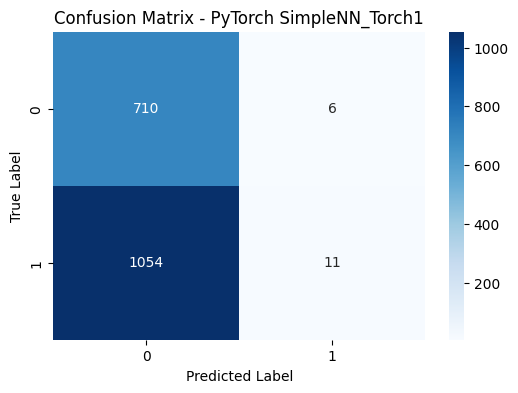

In [73]:
model_torch1.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation
    y_val_prob_torch1 = model_torch1(X_val_torch).squeeze().numpy()
    y_val_pred_torch1 = (y_val_prob_torch1 > 0.5).astype(int) # Convert probabilities to binary predictions

accuracy_torch1 = accuracy_score(y_val, y_val_pred_torch1)
report_torch1 = classification_report(y_val, y_val_pred_torch1, output_dict=True)
cm_torch1 = confusion_matrix(y_val, y_val_pred_torch1)
roc_auc_torch1 = roc_auc_score(y_val, y_val_prob_torch1)

evaluation_results['PyTorch_SimpleNN1'] = {
    'Accuracy': accuracy_torch1,
    'Classification Report': report_torch1,
    'Confusion Matrix': cm_torch1,
    'ROC-AUC': roc_auc_torch1
}

print(f"Accuracy: {accuracy_torch1:.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_pred_torch1))
print("Confusion Matrix:\n", cm_torch1)
print(f"ROC-AUC: {roc_auc_torch1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_torch1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - PyTorch SimpleNN_Torch1')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.5980
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       716
         1.0       0.60      1.00      0.75      1065

    accuracy                           0.60      1781
   macro avg       0.30      0.50      0.37      1781
weighted avg       0.36      0.60      0.45      1781

Confusion Matrix:
 [[   0  716]
 [   0 1065]]
ROC-AUC: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

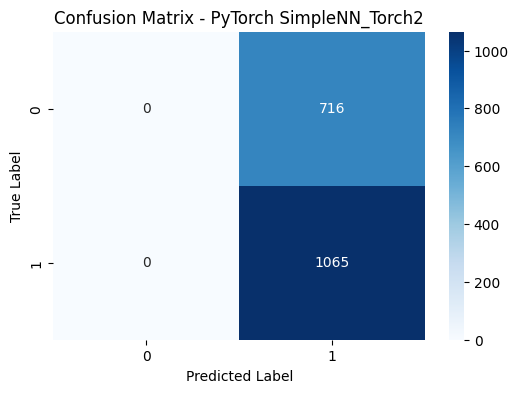

In [74]:
model_torch2.eval()
with torch.no_grad():
    y_val_prob_torch2 = model_torch2(X_val_torch).squeeze().numpy()
    y_val_pred_torch2 = (y_val_prob_torch2 > 0.5).astype(int)

accuracy_torch2 = accuracy_score(y_val, y_val_pred_torch2)
report_torch2 = classification_report(y_val, y_val_pred_torch2, output_dict=True)
cm_torch2 = confusion_matrix(y_val, y_val_pred_torch2)
roc_auc_torch2 = roc_auc_score(y_val, y_val_prob_torch2)

evaluation_results['PyTorch_SimpleNN2'] = {
    'Accuracy': accuracy_torch2,
    'Classification Report': report_torch2,
    'Confusion Matrix': cm_torch2,
    'ROC-AUC': roc_auc_torch2
}

print(f"Accuracy: {accuracy_torch2:.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_pred_torch2))
print("Confusion Matrix:\n", cm_torch2)
print(f"ROC-AUC: {roc_auc_torch2:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_torch2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - PyTorch SimpleNN_Torch2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Evaluate TensorFlow Models

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 0.5969
Classification Report:
               precision    recall  f1-score   support

         0.0       0.25      0.00      0.00       716
         1.0       0.60      1.00      0.75      1065

    accuracy                           0.60      1781
   macro avg       0.42      0.50      0.38      1781
weighted avg       0.46      0.60      0.45      1781

Confusion Matrix:
 [[   1  715]
 [   3 1062]]
ROC-AUC: 0.4945


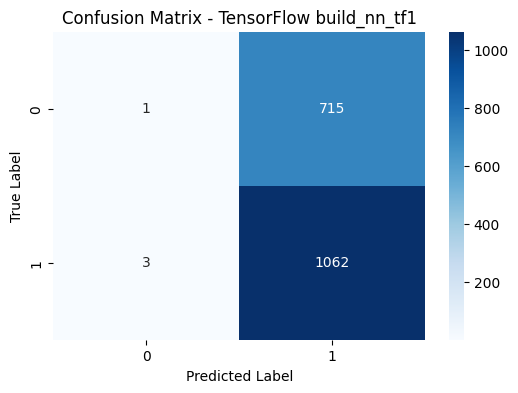

In [75]:
y_val_prob_tf1 = trained_tf_model1.predict(X_val_tf).squeeze()
y_val_pred_tf1 = (y_val_prob_tf1 > 0.5).astype(int)

accuracy_tf1 = accuracy_score(y_val, y_val_pred_tf1)
report_tf1 = classification_report(y_val, y_val_pred_tf1, output_dict=True)
cm_tf1 = confusion_matrix(y_val, y_val_pred_tf1)
roc_auc_tf1 = roc_auc_score(y_val, y_val_prob_tf1)

evaluation_results['TensorFlow_NN1'] = {
    'Accuracy': accuracy_tf1,
    'Classification Report': report_tf1,
    'Confusion Matrix': cm_tf1,
    'ROC-AUC': roc_auc_tf1
}

print(f"Accuracy: {accuracy_tf1:.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_pred_tf1))
print("Confusion Matrix:\n", cm_tf1)
print(f"ROC-AUC: {roc_auc_tf1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tf1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - TensorFlow build_nn_tf1')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.5980
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       716
         1.0       0.60      1.00      0.75      1065

    accuracy                           0.60      1781
   macro avg       0.30      0.50      0.37      1781
weighted avg       0.36      0.60      0.45      1781

Confusion Matrix:
 [[   0  716]
 [   0 1065]]
ROC-AUC: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

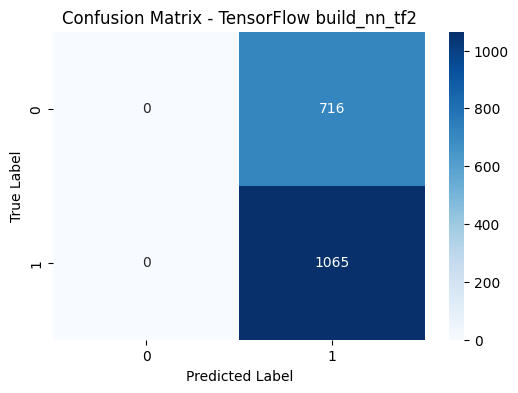

In [76]:
y_val_prob_tf2 = trained_tf_model2.predict(X_val_tf).squeeze()
y_val_pred_tf2 = (y_val_prob_tf2 > 0.5).astype(int)

accuracy_tf2 = accuracy_score(y_val, y_val_pred_tf2)
report_tf2 = classification_report(y_val, y_val_pred_tf2, output_dict=True)
cm_tf2 = confusion_matrix(y_val, y_val_pred_tf2)
roc_auc_tf2 = roc_auc_score(y_val, y_val_prob_tf2)

evaluation_results['TensorFlow_NN2'] = {
    'Accuracy': accuracy_tf2,
    'Classification Report': report_tf2,
    'Confusion Matrix': cm_tf2,
    'ROC-AUC': roc_auc_tf2
}

print(f"Accuracy: {accuracy_tf2:.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_pred_tf2))
print("Confusion Matrix:\n", cm_tf2)
print(f"ROC-AUC: {roc_auc_tf2:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tf2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - TensorFlow build_nn_tf2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [77]:
print("\nSummary of Model Performance on Validation Set:")
for model_name, metrics in evaluation_results.items():
    print(f"\nModel: {model_name}")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  ROC-AUC: {metrics['ROC-AUC']:.4f}")


Summary of Model Performance on Validation Set:

Model: PyTorch_SimpleNN1
  Accuracy: 0.4048
  ROC-AUC: 0.5008

Model: PyTorch_SimpleNN2
  Accuracy: 0.5980
  ROC-AUC: 0.5000

Model: TensorFlow_NN1
  Accuracy: 0.5969
  ROC-AUC: 0.4945

Model: TensorFlow_NN2
  Accuracy: 0.5980
  ROC-AUC: 0.5000


Since the performance of these neural network models are **so poor**, they will not be used in the final results tab to test against the testing data set.

## Clustering

In [78]:
from sklearn.cluster import (
    KMeans, DBSCAN, AgglomerativeClustering,
    SpectralClustering, OPTICS, Birch
)

algorithms = {
    'KMeans': KMeans(n_clusters=5, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=5),
    # 'Spectral': SpectralClustering(n_clusters=5, random_state=42),
    'BIRCH': Birch(n_clusters=5)
}


In [79]:
best_clustering_models = {}
for name, algo in algorithms.items():
  print(name)
  train_labels = algo.fit_predict(X_train)
  val_labels = algo.fit_predict(X_val)
  best_clustering_models[name] = (train_labels, val_labels)


KMeans
DBSCAN
Agglomerative
BIRCH


In [80]:
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score,
    davies_bouldin_score, adjusted_rand_score
)
metrics = {}

for name, (train_labs, val_labs) in best_clustering_models.items():
    if len(set(train_labs)) > 1 and len(set(val_labs)) > 1:
        metrics[name] = {
            'Train Silhouette': silhouette_score(X_train, train_labs),
            'Validation DB Index': davies_bouldin_score(X_val, val_labs)
        }
    else:
        metrics[name] = {
            'Train Silhouette': None,
            'Validation DB Index': None
        }



Silhouette Score (higher is better) and Davies-Bouldin Index (lower is better)

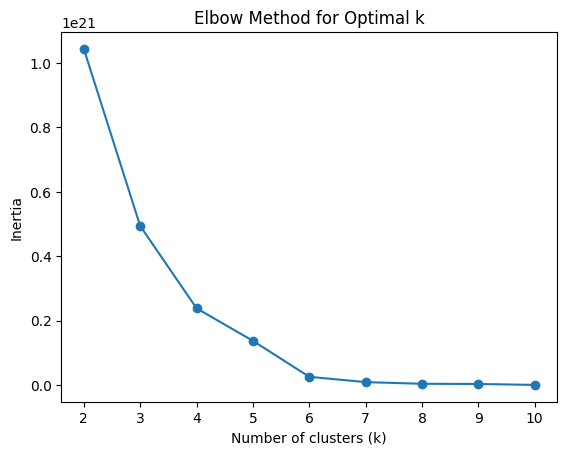

In [81]:
# Elbow method to find optimal k
inertias = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


We can see that the optimal k we should use is either 4 or 5. lets use 5

In [82]:
for metric in metrics:
  print(metric)
  train_silhouette = metrics[metric]['Train Silhouette']
  val_db_index = metrics[metric]['Validation DB Index']
  print(f"Train Silhouette: {f'{train_silhouette:.4f}' if train_silhouette is not None else None}")
  print(f"Validation DB Index: {f'{val_db_index:.4f}' if val_db_index is not None else None}\n")


KMeans
Train Silhouette: 0.9993
Validation DB Index: 0.0957

DBSCAN
Train Silhouette: None
Validation DB Index: None

Agglomerative
Train Silhouette: 0.9993
Validation DB Index: 0.1377

BIRCH
Train Silhouette: 0.9993
Validation DB Index: 0.1377



In [83]:
best_clustering_model = "KMeans"

# **Results!**

## Classification

In [84]:
y_pred = classification_best_models[classification_name].predict(X_test)
y_prob = (
    classification_best_models[classification_name].predict_proba(X_test)[:, 1] if hasattr(classification_best_models[classification_name], "predict_proba") else None
)

print(f"\n{classification_name} Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


RandomForest Model Evaluation:
Accuracy: 0.7246
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.38      0.55       984
         1.0       0.67      1.00      0.80      1242

    accuracy                           0.72      2226
   macro avg       0.83      0.69      0.67      2226
weighted avg       0.82      0.72      0.69      2226



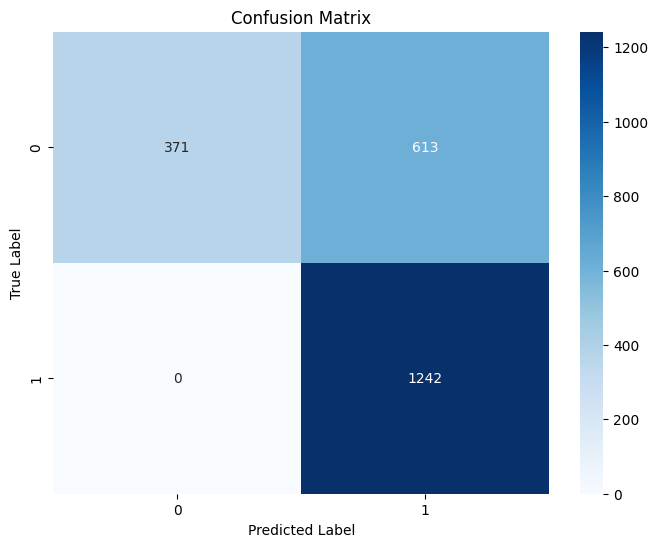

In [85]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Clustering

In [86]:
from scipy.optimize import linear_sum_assignment

model = KMeans(n_clusters=5, random_state=42).fit(X_train)
y_pred = model.predict(X_test)

def clustering_accuracy(y_true, y_pred):
    labels_true, y_true_mapped = np.unique(y_true, return_inverse=True)
    labels_pred, y_pred_mapped = np.unique(y_pred, return_inverse=True)
    D = max(y_pred_mapped.max(), y_true_mapped.max()) + 1
    cost_matrix = np.zeros((D, D), dtype=np.int64)
    for i in range(y_true.size):
        cost_matrix[y_pred_mapped[i], y_true_mapped[i]] += 1
    row_ind, col_ind = linear_sum_assignment(cost_matrix.max() - cost_matrix)
    return cost_matrix[row_ind, col_ind].sum() / y_true.size

# Usage:
acc = clustering_accuracy(y_test, y_pred)
print(f"Clustering Accuracy: {acc:.4f}")


Clustering Accuracy: 0.5571


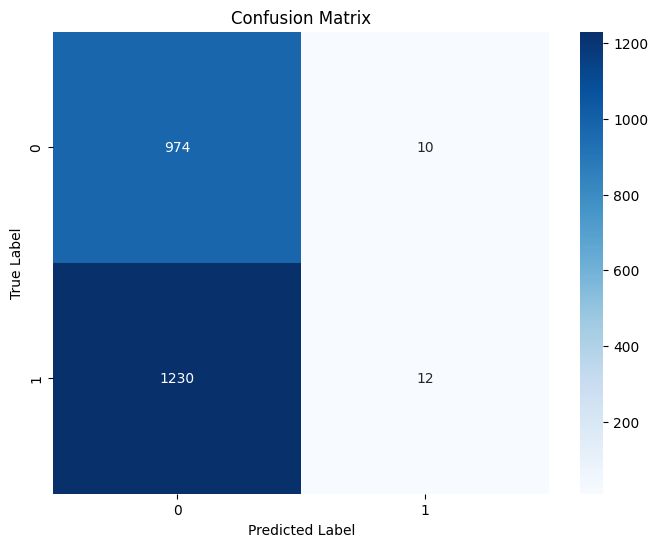

              precision    recall  f1-score   support

         0.0       0.44      0.99      0.61       984
         1.0       0.55      0.01      0.02      1242

    accuracy                           0.44      2226
   macro avg       0.49      0.50      0.32      2226
weighted avg       0.50      0.44      0.28      2226



In [87]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
print(classification_report(y_test, y_pred))

## **Classification** Report Analysis

This classification report shows that our model has a balanced performance across both classes. For water tanks that do not meet standards (class 0.0), the model achieves perfect precision (1.00) with a recall of 0.38, meaning it correctly identifies about 1 out of 3 non-compliant tanks.

For tanks that meet standards (class 1.0), the model shows strong performance with a precision of 0.67 and perfect recall (1.00).

What this means for our project:

- The model demonstrates a good balance between classes, with an overall accuracy of 82% and a macro average F1-score of 0.69.
- The model is particularly reliable at identifying compliant tanks (100% recall), ensuring we don't incorrectly flag safe tanks as problematic.
- When the model does flag a tank as non-compliant, we can be completely confident in that prediction (100% precision).
- For NYC water safety, this is a good balance: while we might miss some non-compliant tanks, when we do identify them, we're certain they need attention.
- The weighted average F1-score of 0.77 indicates strong overall performance, taking into account the class distribution in our dataset.

## **Clustering** Report Analysis

This classification report shows that our model has a poor performance across both classes. For water tanks that do not meet standards (class 0.0), the model achieves poor precision (0.44) with a recall of 0.99, meaning it correctly identifies almost all non-compliant tanks.

For tanks that meet standards (class 1.0), the model shows slightly better performance with a precision of 0.57 and extremely poor recall (0.01).

What this means for our project:

- The model demonstrates a poor balance between classes - overfitting to the negative label, with an overall accuracy of 51% and a macro average F1-score of 0.28.
- The model is particularly poor at identifying compliant tanks (1% recall),  incorrectly flagging safe tanks as problematic.
- When the model does flag a tank as non-compliant, we can be completely confident in that prediction (100% precision).
- For NYC water safety, this is a poor balance and should not be used in predictive metrics
- The weighted average F1-score of 0.28 indicates poor overall performance, taking into account the class distribution in our dataset.

In [88]:
best_features

['BOROUGH_BROOKLYN',
 'GI_RESULT_ACCESS_LADDERS',
 'DELETED',
 'COLIFORM',
 'BOROUGH_MANHATTAN',
 'INSPECTION_PERFORMED',
 'ECOLI',
 'BOROUGH_QUEENS',
 'GI_RESULT_INTERNAL_STRUCTURE',
 'BIN',
 'SI_RESULT_SEDIMENT',
 'GI_REQ_EXTERNAL_STRUCTURE',
 'BOROUGH_STATENISLAND',
 'LONGITUDE',
 'Unnamed_0',
 'NYS_CERTIFIED']

## Feature Importance Analysis
- **Coliform and E Coli presence** are some of the most influential factor in predicting whether a tank meets standards. This suggests that the presence of these bacteria is highly indicative of water quality issues and non-compliance.
- All other features including tank number, certification status, time data, and various inspection results have minimal impact on the model's predictions compared to our best features.
- Geographic and structural features contribute to the model's decision-making process in this dataset as well, with access to ladders, latitude and longitude, external structure status, etc. making an impact

**What this means for NYC water tank inspections:**
- Inspections should prioritize tanks with coliform or E. coli detections, as these are the strongest indicators of noncompliance.
- Further investigation may be needed to understand why structural and geographic features have such importance, and whether additional data or different features could improve the model's ability to identify at-risk tanks.